In [6]:
# %pip install folium
# %pip install mplleaflet
# %pip install selenium
# %pip install kaleido
## %pip install geopandas there is some issue with downloading geopandas
## %pip install sklearn didn't work
# %pip install scikit-learn

In [8]:
import pandas as pd
import numpy as np

## Only run once
# df = pd.read_csv('../data/acled/africa.csv')
# sudan = df[df["COUNTRY"].str.contains("South Sudan")]
# sudan.to_csv('../data/acled/south_sudan.csv', index=False)

sudan = pd.read_csv('../data/acled/south_sudan.csv')
# sudan.shape

## events with fatalities
deaths = sudan[sudan["FATALITIES"] > 0]
deaths.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
1,SSD9474,2023-09-28,2023,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (South Sudan),NaN,3,...,Bor,6.209,31.559,2,Eye Radio (South Sudan); Radio Tamazuj,National,"On 28 September 2023, unidentified gunmen atta...",2,NaN,1696268002
2,SSD9473,2023-09-27,2023,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (South Sudan),NaN,3,...,Anyidi,6.180,31.811,2,Eye Radio (South Sudan),National,"On 27 September 2023, unidentified gunmen atta...",1,NaN,1696268002
5,SSD9472,2023-09-24,2023,2,Political violence,Violence against civilians,Attack,Turkana Ethnic Militia (Kenya),NaN,4,...,Nadapal,4.452,34.188,2,Radio Tamazuj,National,"Around 24 September 2023, a suspected Turkana ...",1,NaN,1696268002
6,SSD9470,2023-09-23,2023,1,Political violence,Violence against civilians,Attack,Military Forces of South Sudan (2011-),NaN,1,...,Ombasi,3.887,30.608,2,Eye Radio (South Sudan); Radio Tamazuj,National,"On 23 September 2023, SSPDF shot and killed a ...",3,NaN,1696268002
7,SSD9471,2023-09-23,2023,1,Political violence,Violence against civilians,Attack,NAS: National Salvation Front,NaN,2,...,Lainya,4.343,31.073,1,Eye Radio (South Sudan); Radio Tamazuj; VOA,National-International,"On 23 September 2023, NAS rebels were reported...",2,NaN,1696268002


In [9]:
# compress to deaths per year based on official conflict dates 
# (for the south sudanese civil war)
start_date = pd.to_datetime('2013-12-15')
end_date = pd.to_datetime('2020-02-22')
deaths['EVENT_DATE'] = pd.to_datetime(deaths['EVENT_DATE'])

mask = (deaths['EVENT_DATE'] >= start_date) & (deaths['EVENT_DATE'] <= end_date)

filtered_deaths = deaths[mask]
yearly_deaths = filtered_deaths[['EVENT_DATE', 'FATALITIES']].copy()

yearly_deaths['EVENT_DATE'] = pd.to_datetime(yearly_deaths['EVENT_DATE'])
yearly_deaths['YEAR'] = yearly_deaths['EVENT_DATE'].dt.year
yearly_deaths['MONTH'] = yearly_deaths['EVENT_DATE'].dt.month

monthly_deaths = yearly_deaths.groupby(['YEAR', 'MONTH'])['FATALITIES'].sum().reset_index()

monthly_deaths.columns = ['YEAR', 'MONTH', 'TOTAL_FATALITIES']
monthly_deaths

/var/folders/wb/67n5x4vj6qq_n5t85f5bvtww0000gn/T/ipykernel_62850/2566754552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['EVENT_DATE'] = pd.to_datetime(deaths['EVENT_DATE'])


,YEAR,MONTH,TOTAL_FATALITIES
0,2013,12,2732
1,2014,1,1202
2,2014,2,640
3,2014,3,302
4,2014,4,963
...,...,...,...
70,2019,10,38
71,2019,11,116
72,2019,12,65
73,2020,1,117


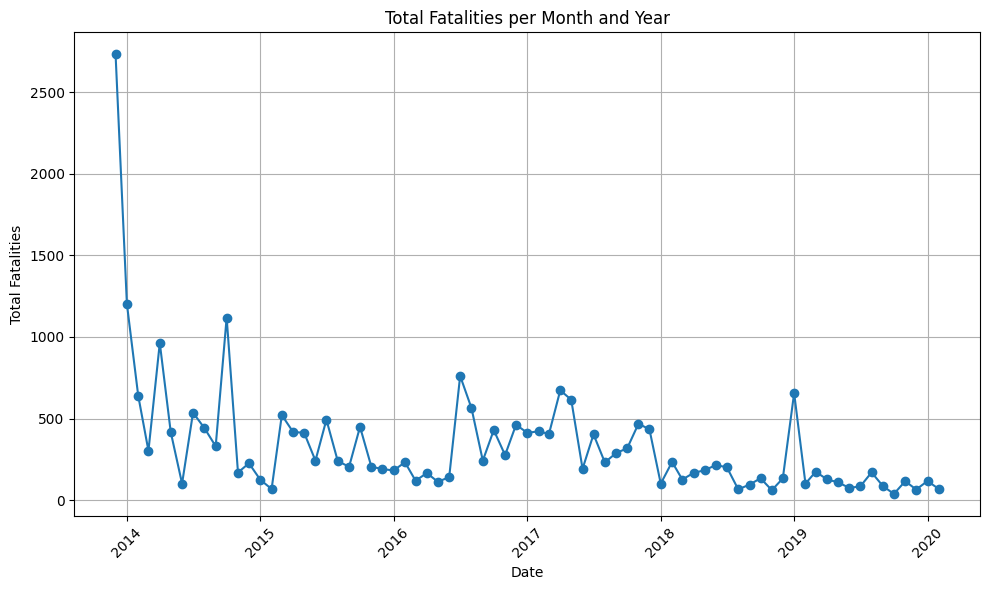

In [10]:
import matplotlib.pyplot as plt

# Combine "YEAR" and "MONTH" columns into a new datetime column
monthly_deaths['DATE'] = pd.to_datetime(monthly_deaths[['YEAR', 'MONTH']].assign(day=1))

# Plotting the data
plt.figure(figsize=(10, 6))  
# Extracting data from the DataFrame
dates = monthly_deaths['DATE']
fatalities = monthly_deaths['TOTAL_FATALITIES']
# Creating a line chart
plt.plot(dates, fatalities, marker='o', linestyle='-')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities per Month and Year')
plt.xticks(rotation=45)
# Show plot
plt.tight_layout()
plt.grid(True)  
plt.show()


In [11]:
## take out outlier of 12-2013, onset of the civil war
no_2013 = monthly_deaths[1:].copy()
no_2013["TIME"] = np.arange(len(no_2013.index))

clipped = no_2013[['TIME', 'TOTAL_FATALITIES', 'DATE']].copy()
clipped


,TIME,TOTAL_FATALITIES,DATE
1,0,1202,2014-01-01
2,1,640,2014-02-01
3,2,302,2014-03-01
4,3,963,2014-04-01
5,4,417,2014-05-01
...,...,...,...
70,69,38,2019-10-01
71,70,116,2019-11-01
72,71,65,2019-12-01
73,72,117,2020-01-01


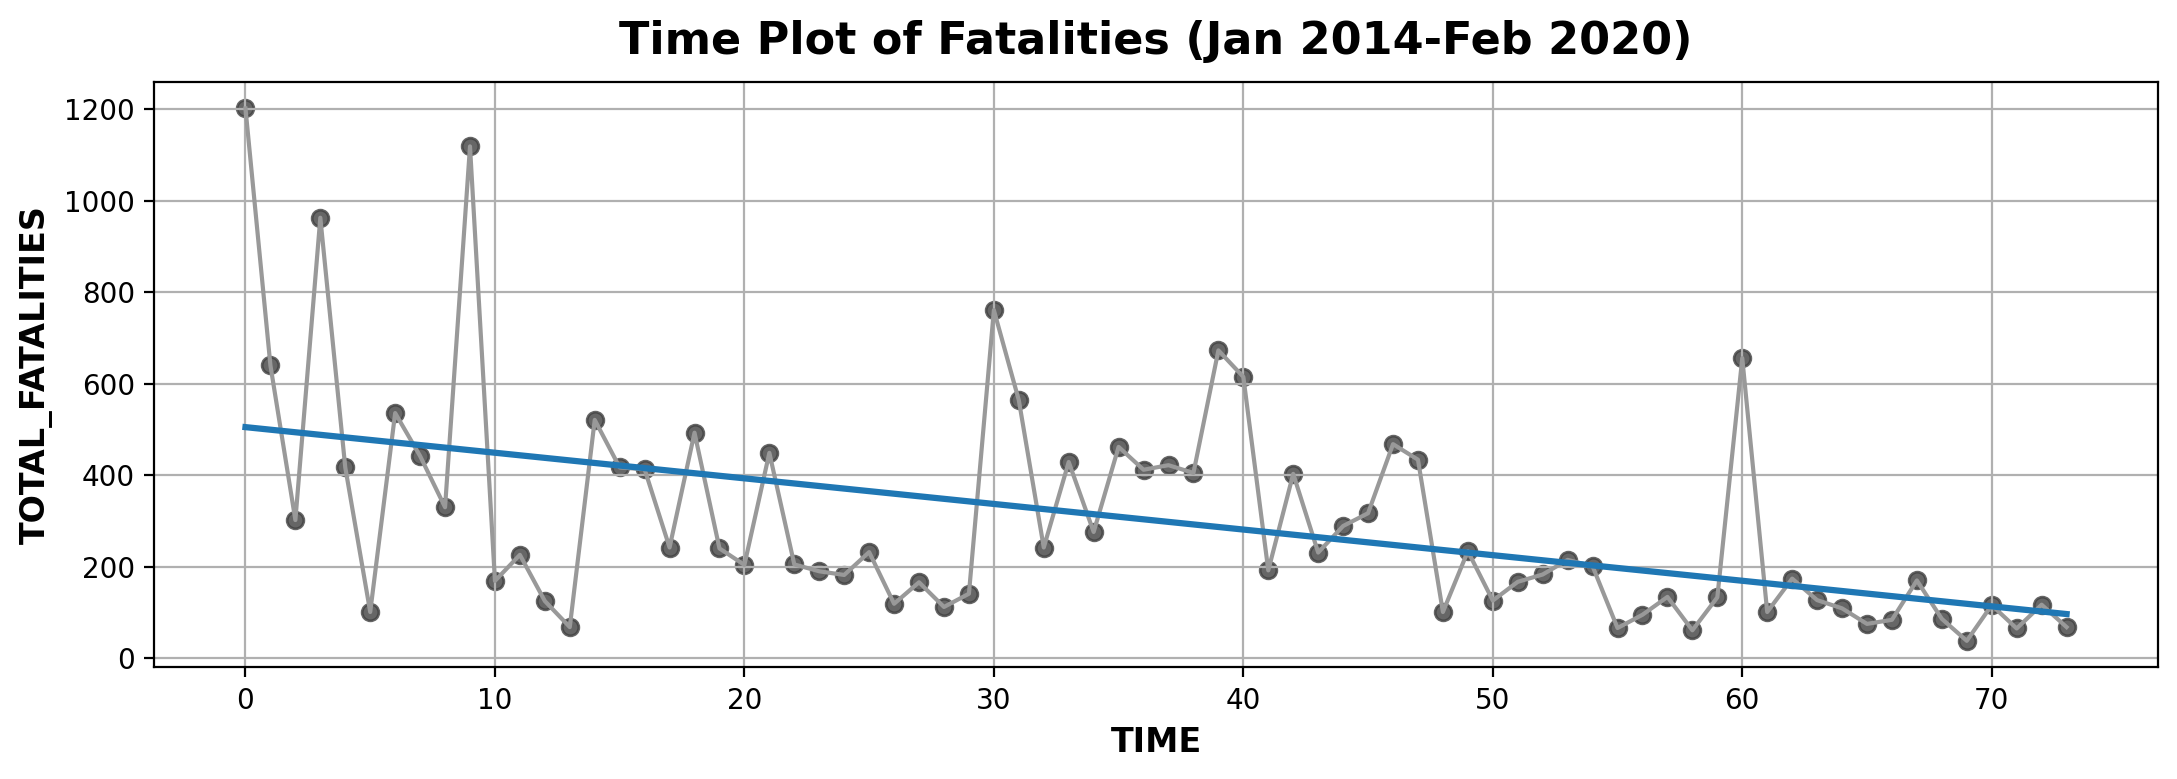

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
fig, ax = plt.subplots()
ax.plot('TIME', 'TOTAL_FATALITIES', data=clipped, color='0.6')

# When this configuration is applied, any Matplotlib plots generated 
# within the Jupyter Notebook will use the 'retina' format for better 
# visual quality. 
%config InlineBackend.figure_format = 'retina'

ax = sns.regplot(x='TIME', y='TOTAL_FATALITIES', data=clipped, 
                 ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Fatalities (Jan 2014-Feb 2020)');

# Show plot
plt.tight_layout()
plt.grid(True)  
plt.show()

In [13]:
clipped['LAG_FEATURE'] = clipped['TOTAL_FATALITIES'].shift(1)
df = clipped.reindex(columns=['TOTAL_FATALITIES', 'LAG_FEATURE'])

df.head()

,TOTAL_FATALITIES,LAG_FEATURE
1,1202,NaN
2,640,1202.0
3,302,640.0
4,963,302.0
5,417,963.0


Text(0.5, 1.0, 'Lag Plot of Fatalities')

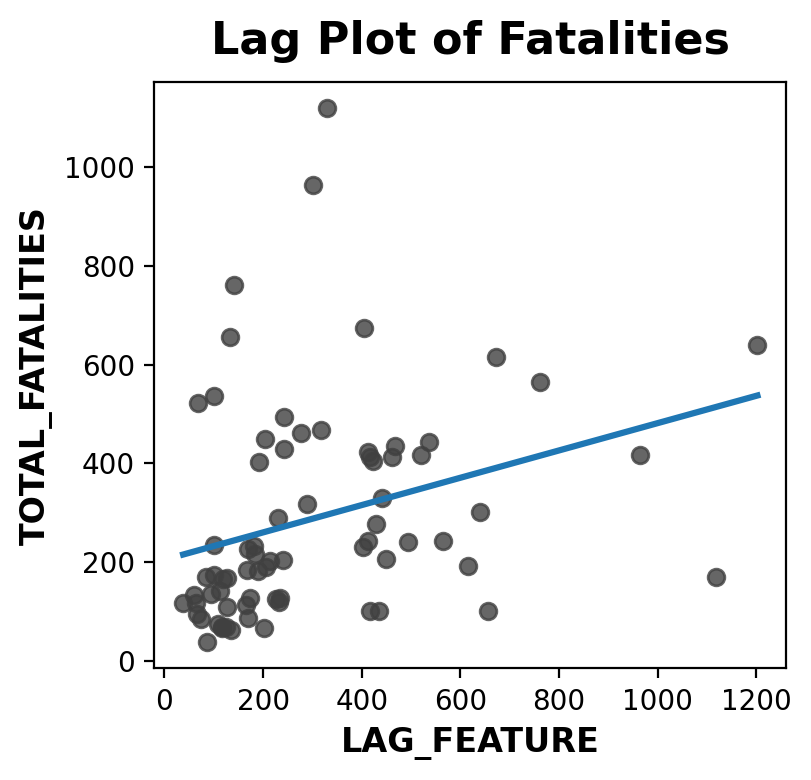

In [14]:
fig, ax = plt.subplots()
ax = sns.regplot(x='LAG_FEATURE', y='TOTAL_FATALITIES', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Fatalities')

In [49]:
from sklearn.linear_model import LinearRegression

# event_breakdown is not contiguous, nor is daily. 
# COULD interpolate, but probably not great
event_breakdown = filtered_deaths[['EVENT_DATE', 'FATALITIES']].copy()

# Take out dec 2013
month_breakdown = monthly_deaths[['DATE', 'TOTAL_FATALITIES']].copy()[1:]
month_breakdown['TIME'] = np.arange(len(month_breakdown.index))

# # Training data
X = month_breakdown.loc[:, ['TIME']]  # features
y = month_breakdown.loc[:, 'TOTAL_FATALITIES']  # target

# # Train the model
model = LinearRegression()
model.fit(X, y)

# # Store the fitted values as a time series with the same time index as
# # the training data
y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Time Plot of Fatalities')

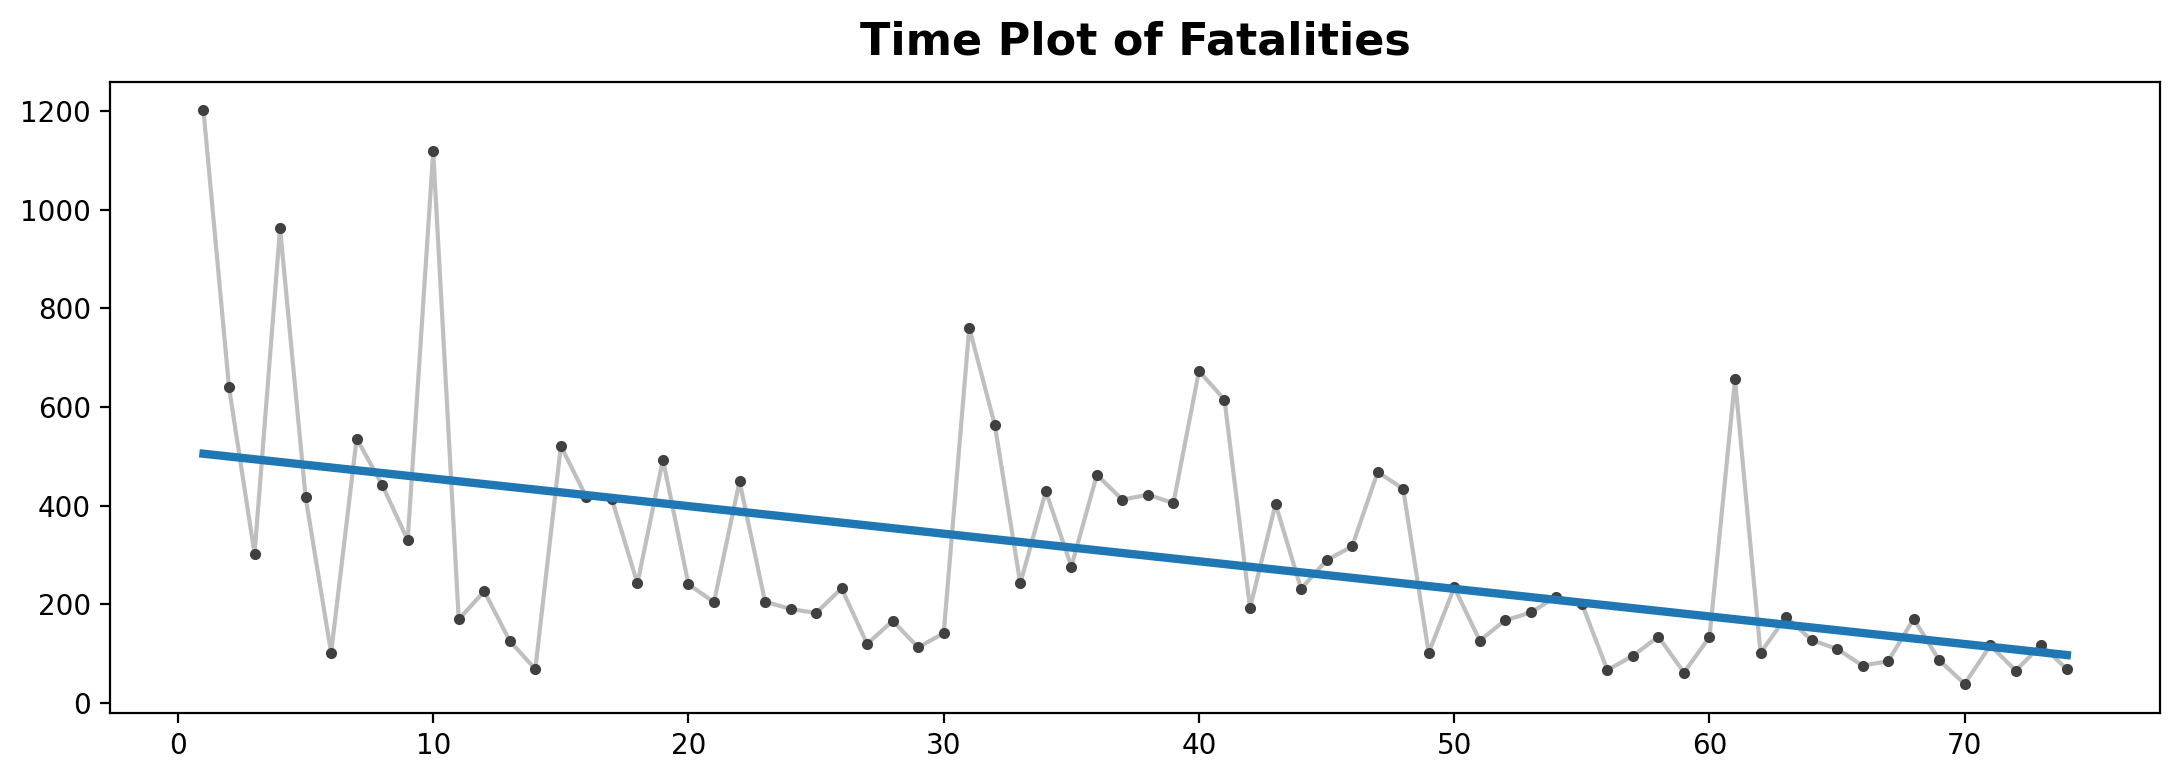

In [50]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Fatalities')

In [52]:
month_breakdown['LAG'] = month_breakdown['TOTAL_FATALITIES'].shift(1)
month_breakdown.head()

,DATE,TOTAL_FATALITIES,TIME,LAG
1,2014-01-01,1202,0,NaN
2,2014-02-01,640,1,1202.0
3,2014-03-01,302,2,640.0
4,2014-04-01,963,3,302.0
5,2014-05-01,417,4,963.0


In [55]:
X = month_breakdown.loc[:, ['LAG']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = month_breakdown.loc[:, 'TOTAL_FATALITIES']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Fatalities')

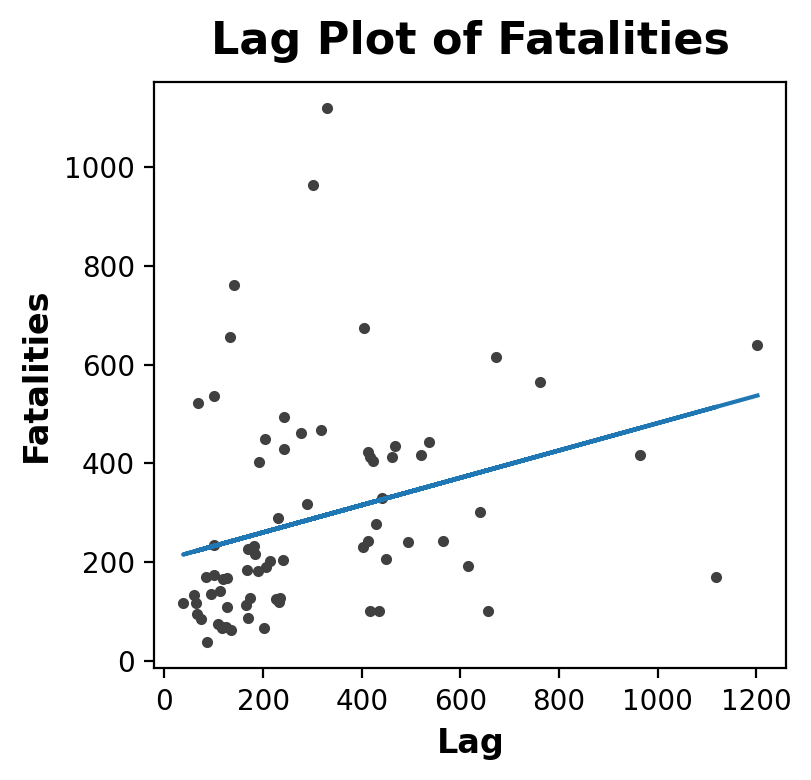

In [58]:
fig, ax = plt.subplots()
ax.plot(X['LAG'], y, '.', color='0.25')
ax.plot(X['LAG'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Fatalities')
ax.set_xlabel('Lag')
ax.set_title('Lag Plot of Fatalities')

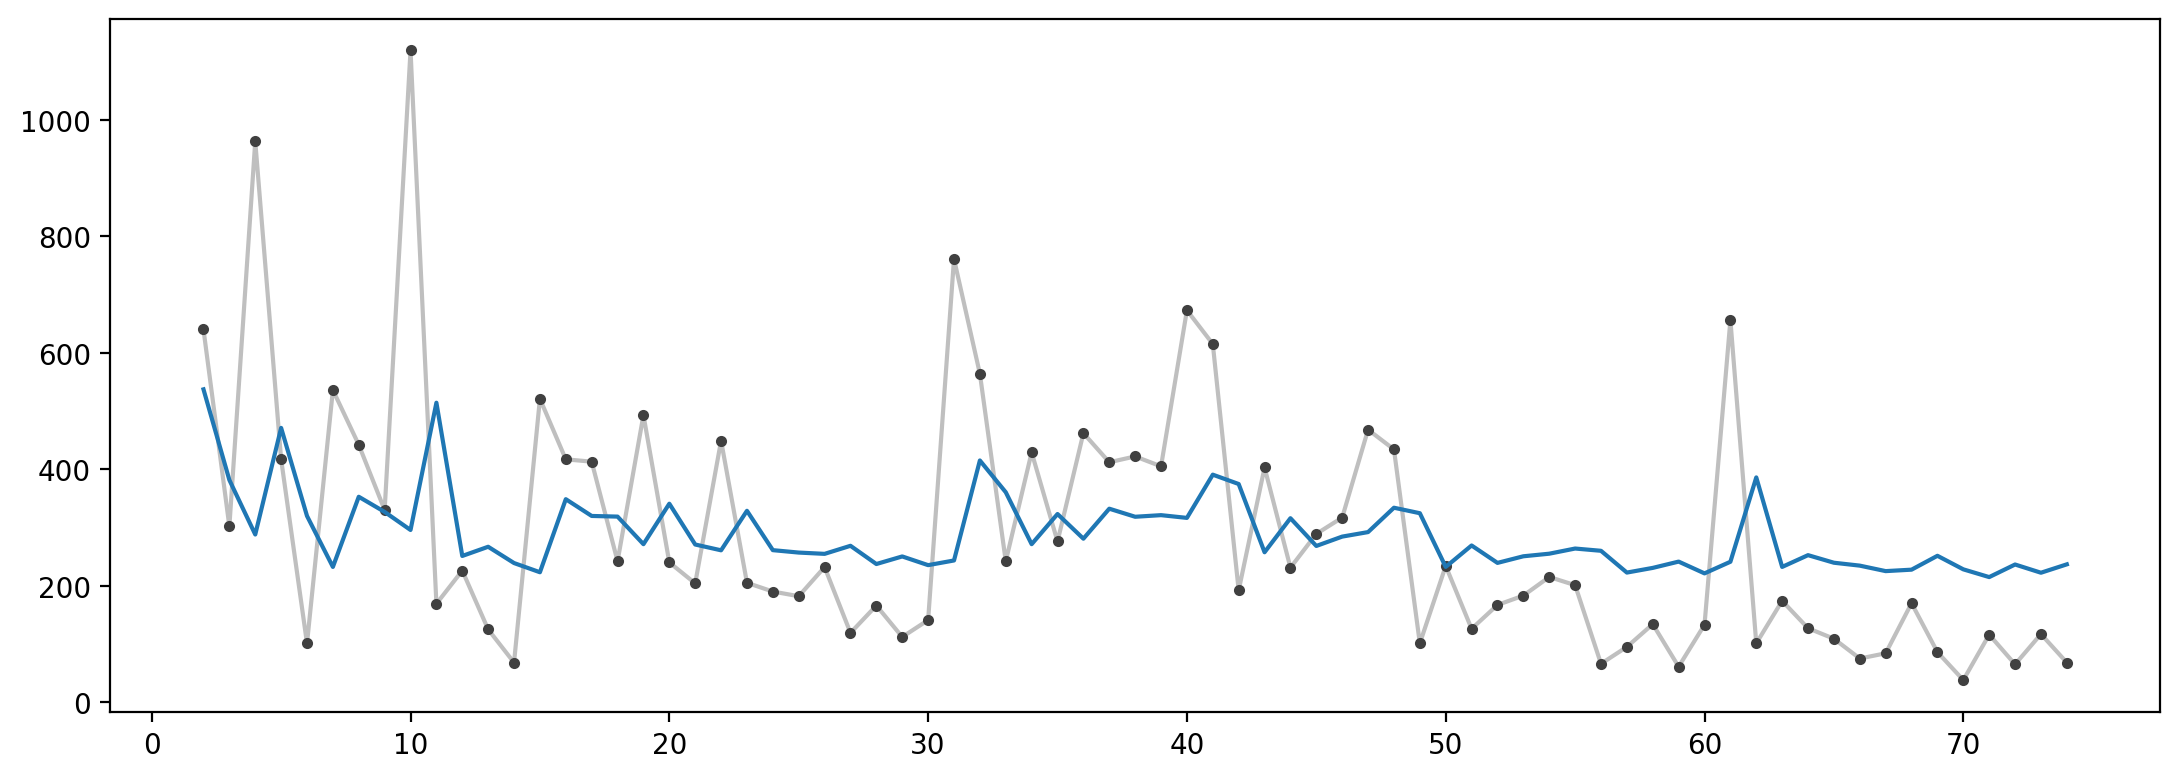

In [59]:
ax = y.plot(**plot_params)
ax = y_pred.plot()